In [1]:
from netCDF4 import Dataset
import numpy.ma as ma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [23]:
path = r"C:/Users/ALTIER/Desktop/master_thesis/outputs/hydrothermal_output/control.e"
assert os.path.isfile(path)
with open(path, "r") as f:
    pass

In [24]:
control_mesh = Dataset("C:/Users/ALTIER/Desktop/master_thesis/outputs/hydrothermal_output/control.e")

In [25]:
#coordinates of the nodes

x1_coord = np.array(control_mesh['coordx'][:])
y1_coord = np.array(control_mesh['coordy'][:])
z1_coord = np.array(control_mesh['coordz'][:])

coords1 = np.zeros((len(x1_coord),3))
coords1[:,0] = x1_coord ; coords1[:,1] = y1_coord ; coords1[:,2] = z1_coord
len(coords1)

935274

In [26]:
#T and P variables, Global variables

nodal_vals = np.array(control_mesh['vals_nod_var2']).T

In [139]:
#Second mesh reader

path = r"C:/Users/ALTIER/Desktop/master_thesis/outputs/hydrothermal_output/17.e"
assert os.path.isfile(path)
with open(path, "r") as f:
    pass

conv = Dataset("C:/Users/ALTIER/Desktop/master_thesis/outputs/hydrothermal_output/17.e")

x2_coord = np.array(conv['coordx'][:])
y2_coord = np.array(conv['coordy'][:])
z2_coord = np.array(conv['coordz'][:])

t_vals =  np.array(conv['vals_nod_var2']).T
coords2 = np.zeros((len(x2_coord),3))
coords2[:,0] = x2_coord ; coords2[:,1] = y2_coord ; coords2[:,2] = z2_coord
len(coords2)

74000

In [140]:
time1 = np.array(control_mesh['time_whole'])
time2 = np.array(conv['time_whole'])
time1,time2

(array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
        1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ]),
 array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
        1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ]))

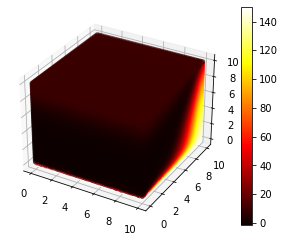

In [141]:
#3D visualization

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = x2_coord
y = y2_coord
z = z2_coord
c = t_vals[:,24]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()


In [142]:
# Searching for same elements for L2 error calculation

A = coords1
B = coords2

#idx_A=[];idx_B=[]
#for i,n in enumerate(A):
#    for j,m in enumerate(B):
#        if np.linalg.norm(A[i]-B[j])==0:
#            idx_A.append(i),idx_B.append(j)
            
nrows, ncols = A.shape
dtype={'names':['f{}'.format(i) for i in range(ncols)],
       'formats':ncols * [A.dtype]}

#K =np.array([[0,0,0],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1],[1,1,1],
#            [0,0,0.33],[1,0,0.33],[0,1,0.33],[1,1,0.33],
#            [0,0,0.66],[1,0,0.66],[0,1,0.66],[1,1,0.66]])
#aa = np.intersect1d(K.view(dtype),A.view(dtype),return_indices=True)
#ca,K_idx,A_idx = zip(aa)
#bb = np.intersect1d(K.view(dtype),B.view(dtype),return_indices=True)
#cb,K_idx,B_idx = zip(bb)

C = np.intersect1d(A.view(dtype), B.view(dtype),return_indices= True)

comm_points,A_idx,B_idx = zip(C)
comm_points

(array([( 0. ,  0. ,  0.        ), ( 0. ,  0. ,  2.        ),
        ( 0. ,  0. ,  3.3       ), ( 0. ,  0. ,  4.        ),
        ( 0. ,  0. ,  6.        ), ( 0. ,  0. ,  6.6       ),
        ( 0. ,  0. ,  8.        ), ( 0. ,  0. , 10.        ),
        ( 0. ,  2. ,  0.        ), ( 0. ,  2. ,  3.3       ),
        ( 0. ,  2. ,  6.6       ), ( 0. ,  2. , 10.        ),
        ( 0. ,  4. ,  0.        ), ( 0. ,  4. ,  3.3       ),
        ( 0. ,  4. ,  6.6       ), ( 0. ,  4. , 10.        ),
        ( 0. ,  6. ,  0.        ), ( 0. ,  6. ,  3.3       ),
        ( 0. ,  6. ,  6.6       ), ( 0. ,  6. , 10.        ),
        ( 0. ,  8. ,  0.        ), ( 0. ,  8. ,  3.3       ),
        ( 0. ,  8. ,  6.6       ), ( 0. ,  8. , 10.        ),
        ( 0. , 10. ,  0.        ), ( 0. , 10. ,  2.        ),
        ( 0. , 10. ,  3.3       ), ( 0. , 10. ,  4.        ),
        ( 0. , 10. ,  6.        ), ( 0. , 10. ,  6.6       ),
        ( 0. , 10. ,  7.06666667), ( 0. , 10. ,  8.        ),
        

In [143]:
#Values of coordinates in arrays

c_T_vals = np.array([nodal_vals[i,:] for i in A_idx ])
n_T_vals = np.array([t_vals[i,:] for i in B_idx ]) # take all time steps for equilibrium state

In [144]:
#L2-norm error (LSE)

def L2_norm(a,b):
    return np.linalg.norm(a-b) 

err=[]
for i in range(0,len(c_T_vals[0,0,:])):
    err.append(f'{L2_norm(n_T_vals[0,:,i],c_T_vals[0,:,i]):.20f}')
    
err

['0.00582407694824930121',
 '0.21587116809839848597',
 '1.45153068649502392518',
 '1.27463749001980830577',
 '3.52512297044107736355',
 '5.88432129365518541420',
 '3.23123149249782981585',
 '6.44912215233515340174',
 '6.46733130199972183760',
 '5.54899045534724955075',
 '5.05652817848382429844',
 '4.95694552668522181449',
 '4.82185221579355260957',
 '4.67698746921645014396',
 '4.58915705119314143445',
 '4.94636004189022049360',
 '5.06551149315916315885',
 '4.96039685587112444409',
 '4.79914042311805921770',
 '4.73091528270979377879',
 '4.66377236673611417217',
 '4.57809408645134485738',
 '4.47752387011980967912',
 '4.36762935364615145772',
 '4.25575464526157265510',
 '4.14503159261967457638',
 '4.03938012314627403754',
 '3.94028760228503127649',
 '3.84913111756357206872',
 '3.76620740970253375934']

In [145]:
#Forming dataframes and saving as csv

Mesh_size.iloc[16] = len(coords2)
Hydrothermal_conv.iloc[16] = err
Hydrothermal_conv.to_csv("hydrothermal.csv", sep = ',' , index = True )
Mesh_size.to_csv("mesh.csv" , index = True )
Hydrothermal_conv

Time Step 1              Time Step 2  \
Mesh1   11.85619924640729649923  14.60437864379159300654   
Mesh2    0.43817486357593177226   3.17401752856544883130   
Mesh3    0.12932875863322310095   2.22404613283754981623   
Mesh4    0.13718622913034661526   2.08471205060973341361   
Mesh5    0.02979057763342157772   1.00540459310520069458   
Mesh6    0.04728987686379236555   1.22760940443717991855   
Mesh7    0.03660880023238070879   0.84218096838042988406   
Mesh8    0.02805189283908992443   0.68092846655054561911   
Mesh9    0.02867876356018938741   0.81563290568104285239   
Mesh10   0.01837675045399254914   0.57792398589606097659   
Mesh11   0.01517050208556040662   0.52602393827488647116   
Mesh12   0.01703913733478465420   0.54494649641033010568   
Mesh13   0.01137504693321161366   0.38967263118831652058   
Mesh14   0.00967492744364095540   0.33743798019926701803   
Mesh15   0.01288862341300196779   0.35787729047411009908   
Mesh16   0.00829285201404520063   0.30442912632900864800   
Mesh17   0.00582407694824930121   0.21587116809839848597   

                    Time Step 3              Time Step 4  \
Mesh1   22.34245722739289163883  29.89924314763977974962   
Mesh2   11.89874566625586105317  15.09034128283198938902   
Mesh3   11.14935200473704490776  16.39812742126596845083   
Mesh4    9.35098598715205930887  10.42478751219247534721   
Mesh5    6.00218464857483713359   7.07304279684431946862   
Mesh6    6.87256251823646380217   9.04763547569295312201   
Mesh7    5.46193135835185650251   8.26898128877855320695   
Mesh8    4.06007188202234914343   5.26384651141529769092   
Mesh9    5.04407396873684366057   7.56708735787131470119   
Mesh10   3.68934988349264614271   4.87389887842605773471   
Mesh11   3.63826201467421883606   5.04132972880344887301   
Mesh12   3.39935645285048781972   3.74203425459502359018   
Mesh13   2.67741633337406037541   3.33100660577602525336   
Mesh14   2.21437487260438947700   2.14709360320765707542   
Mesh15   2.40902015506430089431   3.20291330397386975193   
Mesh16   2.13982781372728458891   2.89117500509548186471   
Mesh17   1.45153068649502392518   1.27463749001980830577   

                    Time Step 5              Time Step 6  \
Mesh1   51.77782906517392547130  70.56585103762169808306   
Mesh2   24.65965091034802370018  38.52803039046393251965   
Mesh3   20.18815532918809196872  30.42609114064130437782   
Mesh4   14.86188494761052858451  26.35425628782740403722   
Mesh5   10.16683931148469532957  19.53808030705160447837   
Mesh6   10.62960924533443751727  17.36887154162553059678   
Mesh7    7.48374126138762552074  15.10692941784817655559   
Mesh8    8.49628895578604392824  14.04354904443875540210   
Mesh9    8.08607028230580482386  13.11252256113421132966   
Mesh10   6.24538255049738122437  11.07823687705637460965   
Mesh11   4.53710579901913479972   9.60077795067228656478   
Mesh12   5.41407595161469767930   9.76725652101878871747   
Mesh13   3.87440267703076424155   8.02896622492997380505   
Mesh14   4.40791585036208655168   7.54539169243515139840   
Mesh15   4.58896393097093024949   7.39592204193034152837   
Mesh16   3.68165600724719910275   6.36320767650478913424   
Mesh17   3.52512297044107736355   5.88432129365518541420   

                    Time Step 7              Time Step 8  \
Mesh1   53.68948018264681820710  38.28962642174630559566   
Mesh2   24.94941579928299191238  18.63987037039964533847   
Mesh3   21.39745957158307376744  15.25469127763301102618   
Mesh4   16.66146838418190156972  18.63650104913361715830   
Mesh5   10.92134101610268359650  11.85585504361602460222   
Mesh6   10.71362784468613682520  13.48390789018954016854   
Mesh7   10.68687131125025224776  12.29992146794478813376   
Mesh8    9.40972325560249345244  13.23529068675692244028   
Mesh9   10.62923343396524877846  13.78209973197295212799   
Mesh10   7.70632740220781631280  10.06760770956968364942   
Mesh11   4.67878349590766795529   8.80005303434376529026   
Mesh12   4.84330843082542905620   9.55394408476529122254 

Time Step 1  Time Step 2  Time Step 3  Time Step 4  Time Step 5  \
Node Number                                                                    
1144            2.261827    13.325417    12.395111     7.078391     6.035344   
3327            2.625308     4.154051     5.266539     2.984518     2.299145   
6165            2.354712     3.099910     3.541530     2.192481     1.600296   
8541            1.789500     2.383425     2.882778     1.762943     1.340673   
11825           1.505999     2.102217     2.305834     1.330886     1.110576   
14346           1.945889     1.967935     1.938551     1.232009     0.954715   
19147           1.402833     1.702914     1.844618     1.127536     0.936364   
21138           1.516069     1.585595     1.690965     1.066554     0.864514   
24052           1.374946     1.674421     1.647252     1.011562     0.856979   
29538           1.403190     1.412358     1.265748     0.867100     0.701134   
33986           1.291893     1.219740     1.202991     0.807024     0.660568   
37905           1.372554     1.117289     1.186496     0.781906     0.641598   
45702           1.264791     1.065206     1.054203     0.748244     0.634927   
51674           1.156609     0.986379     0.994772     0.672164     0.577458   
56320           1.363334     1.137864     1.014881     0.664279     0.571025   
65943           1.121762     1.025144     0.858498     0.582046     0.508079   
74000           1.163425     0.777846     0.798672     0.567875     0.488957   

             Time Step 6  Time Step 7  Time Step 8  Time Step 9  Time Step 10  \
Node Number                                                                     
1144            5.621755     3.728878     3.942974     2.438574      2.729798   
3327            2.535355     1.524965     1.731468     1.041113      1.113699   
6165            1.696117     1.090481     1.108729     0.764958      0.706718   
8541            1.410033     0.933609     0.945127     0.680622      0.611994   
11825           1.018634     0.789606     0.677855     0.597147      0.456046   
14346           0.971977     0.704168     0.665605     0.531240      0.454623   
19147           0.887677     0.685627     0.628368     0.523760      0.446882   
21138           0.833665     0.641547     0.592803     0.494594      0.427015   
24052           0.787782     0.642958     0.569823     0.504939      0.423696   
29538           0.698126     0.547967     0.515185     0.433622      0.385783   
33986           0.650170     0.514496     0.481586     0.410083      0.363346   
37905           0.623952     0.494223     0.461092     0.394834      0.347952   
45702           0.613831     0.512174     0.471298     0.415805      0.365936   
51674           0.544229     0.456949     0.415297     0.370406      0.322940   
56320           0.539008     0.446567     0.412873     0.362580      0.322308   
65943           0.471662     0.405760     0.370581     0.334642      0.299317   
74000           0.464562     0.394843     0.362075     0.325787      0.288102   

             ...  Time Step 21  Time Step 22  Time Step 23  Time Step 24  \
Node Number  ...                                                           
1144         ...      1.684220      1.698527      1.711836      1.701502   
3327         ...      0.534923      0.442684      0.543334      0.458218   
6165         ...      0.339297      0.323450      0.344008      0.335264   
8541         ...      0.203513      0.198219      0.203194      0.209456   
11825        ...      0.183511      0.122429      0.175086      0.125053   
14346        ...      0.090616      0.095510      0.084043      0.097503   
19147        ...      0.101942      0.101972      0.090149      0.098852   
21138        ...      0.075500      0.078795      0.057597      0.069047   
24052        ...      0.136524      0.125909      0.121150      0.114839   
29538        ...      0.094819      0.097654      0.078086      0.084687   
33986        ...      0.092444      0.08

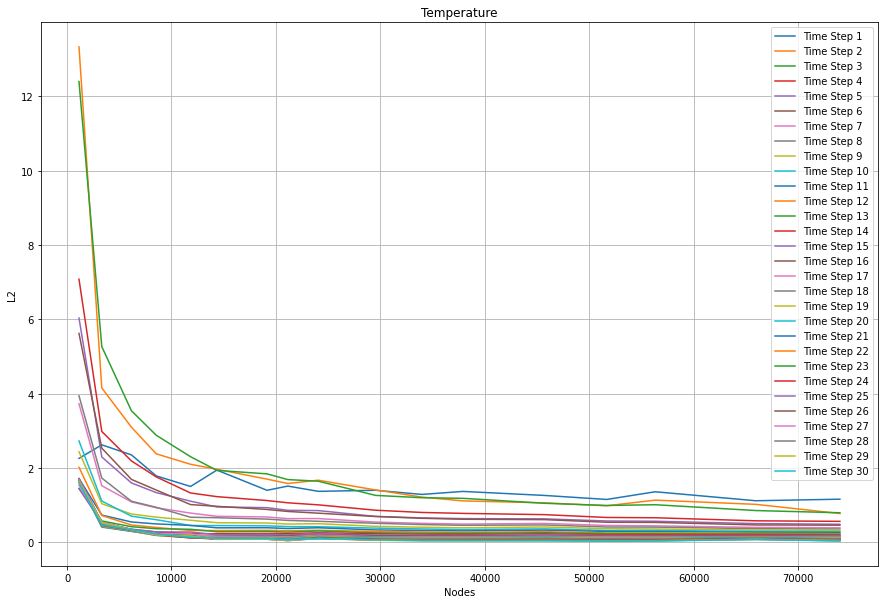

In [131]:
#L2 vs NNodes Graph (Temperature)

L2T = pd.read_csv("thermo.csv", index_col=0 )
NNode = pd.read_csv("mesh.csv", index_col=0)
L2T = L2T.reset_index(drop=True)
NNode = NNode.reset_index(drop=True)
result = pd.concat([L2T,NNode],axis=1)
sub=['Node Number']
mask = result.columns.isin(sub)
result = pd.concat([result.loc[:,mask],result.loc[:,~mask]],axis=1)
result = result.set_index('Node Number')

sub_col = [i for i in range(1,0-1)]
update_T = result.drop(result.columns[sub_col],axis=1,inplace=True)
update_T = result.drop(result.index[[]],axis=0) 
update_T.plot(figsize=(15,10))

plt.xlabel("Nodes")
plt.ylabel("L2")
plt.title("Temperature")
plt.grid()
plt.savefig('Pure Conduction(T) L2 Graph')
update_T

Time Step 1   Time Step 2   Time Step 3   Time Step 4   Time Step 5  \
0   14852.359623  31502.026143  25602.852041  28608.216137  15532.986595   
1    9528.016805  15930.089148  14859.784756  11346.089522   8007.195748   
2    7631.257200   9957.161786   7660.955643   6365.790217   4814.262047   
3    7225.430241   9281.462248   6410.713322   4675.078967   3642.439452   
4    6497.943216   8748.537197   6614.441958   4109.435152   3560.837002   
5    6179.955884   7636.356282   4892.510214   3579.410961   2913.944010   
6    5915.747325   6516.130715   4757.680286   3284.258209   2498.214087   
7    5414.084925   5960.827613   3696.131204   2816.318234   2358.360367   
8    5175.143068   5792.157432   3680.040476   2637.174311   2142.386145   
9    4982.261982   4999.177689   3160.858388   2316.755699   1883.696437   
10   4391.981534   5336.341970   3263.446842   2139.135855   1627.933204   
11   4451.621922   5066.229394   2774.629551   1807.160900   1684.670017   
12   3755.690704   4474.207256   2846.364276   1805.276924   1703.427367   
13   3784.872105   3771.123751   2480.819175   1830.682152   1531.537080   
14   4520.391356   3794.808575   2365.816665   1612.616363   1429.722551   
15   3980.048186   3732.904970   2366.772754   1633.945775   1377.660510   
16   3995.926428   3558.719131   2070.044815   1644.217398   1286.139752   

     Time Step 6   Time Step 7   Time Step 8   Time Step 9  Time Step 10  ...  \
0   26227.590324  15631.181029  21150.022161  15330.240813  17339.718076  ...   
1    9226.127582   7839.418066   6648.552673   7592.079341   5226.147612  ...   
2    5272.207917   5250.597635   4285.681529   4952.472244   3842.415941  ...   
3    3901.219780   3903.490670   3127.174936   3696.178737   2767.481044  ...   
4    3243.040830   3297.028986   2554.153391   3049.023685   2239.656125  ...   
5    3014.611519   2889.340420   2441.773890   2626.170233   2147.458315  ...   
6    2603.198933   2410.641731   2058.604583   2282.125482   1791.394330  ...   
7    2461.435111   2371.223852   2082.772124   2245.881621   1833.387252  ...   
8    2159.698009   2083.732289   1767.703201   2003.642535   1572.875587  ...   
9    1993.103726   1805.031302   1667.994159   1718.410436   1483.474048  ...   
10   1805.297148   1522.565063   1537.921372   1477.181132   1389.464598  ...   
11   1549.954886   1629.259360   1338.171119   1552.427674   1206.853096  ...   
12   1398.472370   1578.805849   1144.985814   1484.015107   1026.545845  ...   
13   1445.251922   1459.694044   1178.059831   1399.689653   1047.562352  ...   
14   1371.440474   1309.848690   1188.596426   1261.367510   1085.155814  ...   
15   1310.209406   1184.035230   1107.860703   1099.090632    997.749451  ...   
16   1391.860549   1163.850366   1193.163998   1111.929643   1068.112038  ...   

    Time Step 21  Time Step 22  Time Step 23  Time Step 24  Time Step 25  \
0    9668.677252   8618.470414   9327.608121   8307.811947   9120.443690   
1    4478.185131   3013.543830   4267.571831   2922.738467   4124.135900   
2    2816.284739   2425.840476   2729.482824   2315.031045   2680.819480   
3    2457.874516   1685.866251   2425.202727   1611.869274   2409.620967   
4    1900.563751   1326.419369   1835.474489   1258.619615   1792.216788   
5    1606.584350   1276.249000   1577.993626   1216.321772   1564.253765   
6    1528.441869   1094.411208   1479.374783   1046.491101   1446.950488   
7    1560.263699   1002.685881   1516.937582    947.436797   1486.967390   
8    1491.413017    963.798380   1457.672918    917.455278   1434.596870   
9    1216.897191    895.009913   1170.481760    843.875573   1134.948391   
10   1121.806612    907.941111   1096.504346    862.701369   1078.249962   
11   1142.538175    742.802080   1110.386940    704.132571   1085.294304   
12   1017.466783    697.989061    972.844237    669.676436    936.786782   
13   1105.241481    761.616317   1075.559259    738.214861   1051.078999   
14   1017.057736    728.041495    992

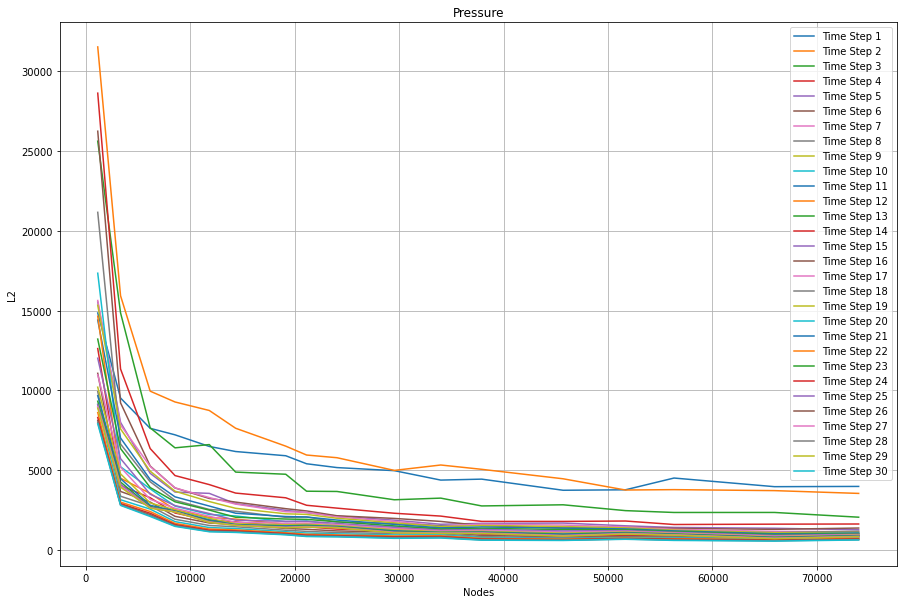

In [265]:
#L2 vs NNodes Graph (Pressure)

L2H = pd.read_csv("hydro.csv", index_col=0 )
NNode = pd.read_csv("mesh.csv", index_col=0)
L2H = L2H.reset_index(drop=True)
NNode = NNode.reset_index(drop=True)
result = pd.concat([L2H,NNode],axis=1)
sub=['Node Number']
mask = result.columns.isin(sub)
result = pd.concat([result.loc[:,mask],result.loc[:,~mask]],axis=1)
result = result.set_index('Node Number')

sub_col = [i for i in range(1,0-1)]
update_H = result.drop(result.columns[sub_col],axis=1,inplace=True)
update_H = result.drop(result.index[[]],axis=0) 
update_H.plot(figsize=(15,10))

plt.xlabel("Nodes")
plt.ylabel("L2")
plt.title("Pressure")
plt.grid()
plt.savefig('Pure Pressure Diffusion(P) L2 Graph')
L2H

In [ ]:
#L2 vs NNodes Graph (Convective)

L2TH = pd.read_csv("hydrothermal.csv", index_col=0 )
NNode = pd.read_csv("mesh.csv", index_col=0)
L2TH = L2TH.reset_index(drop=True)
NNode = NNode.reset_index(drop=True)
result = pd.concat([L2TH,NNode],axis=1)
sub=['Node Number']
mask = result.columns.isin(sub)
result = pd.concat([result.loc[:,mask],result.loc[:,~mask]],axis=1)
result = result.set_index('Node Number')

sub_col = [i for i in range(1,0-1)]
update_T = result.drop(result.columns[sub_col],axis=1,inplace=True)
update_T = result.drop(result.index[[]],axis=0) 
update_T.plot(figsize=(15,10))

plt.xlabel("Nodes")
plt.ylabel("L2")
plt.title("Temperature")
plt.grid()
plt.savefig('Convection(T) L2 Graph')
L2TH